<a href="https://colab.research.google.com/github/soheldatta17/Knee-Arthritis-Detection/blob/main/KneeArthritisDetectionMainSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knee Arthritis Detection using CNN.



## 1. Dataset preparation.

#### 1.1. Download dataset from kaggle.

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hafiznouman786/annotated-dataset-for-knee-arthritis-detection

Dataset URL: https://www.kaggle.com/datasets/hafiznouman786/annotated-dataset-for-knee-arthritis-detection
License(s): CC0-1.0
annotated-dataset-for-knee-arthritis-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -qq annotated-dataset-for-knee-arthritis-detection.zip

Commands above will create a folder with the following content:

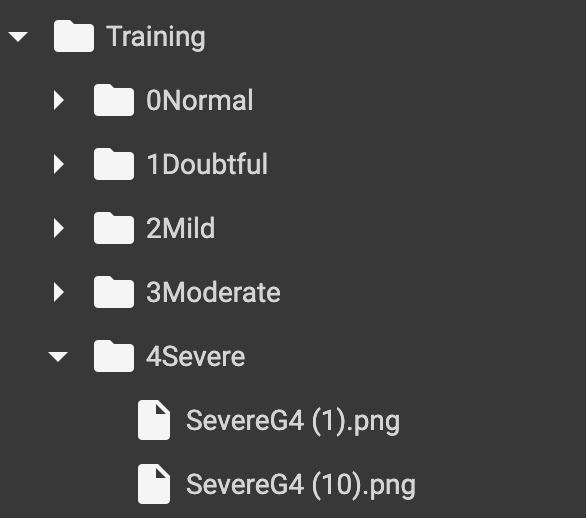

#### 1.2. Load dataset from the file system.

Found 1650 files belonging to 5 classes.


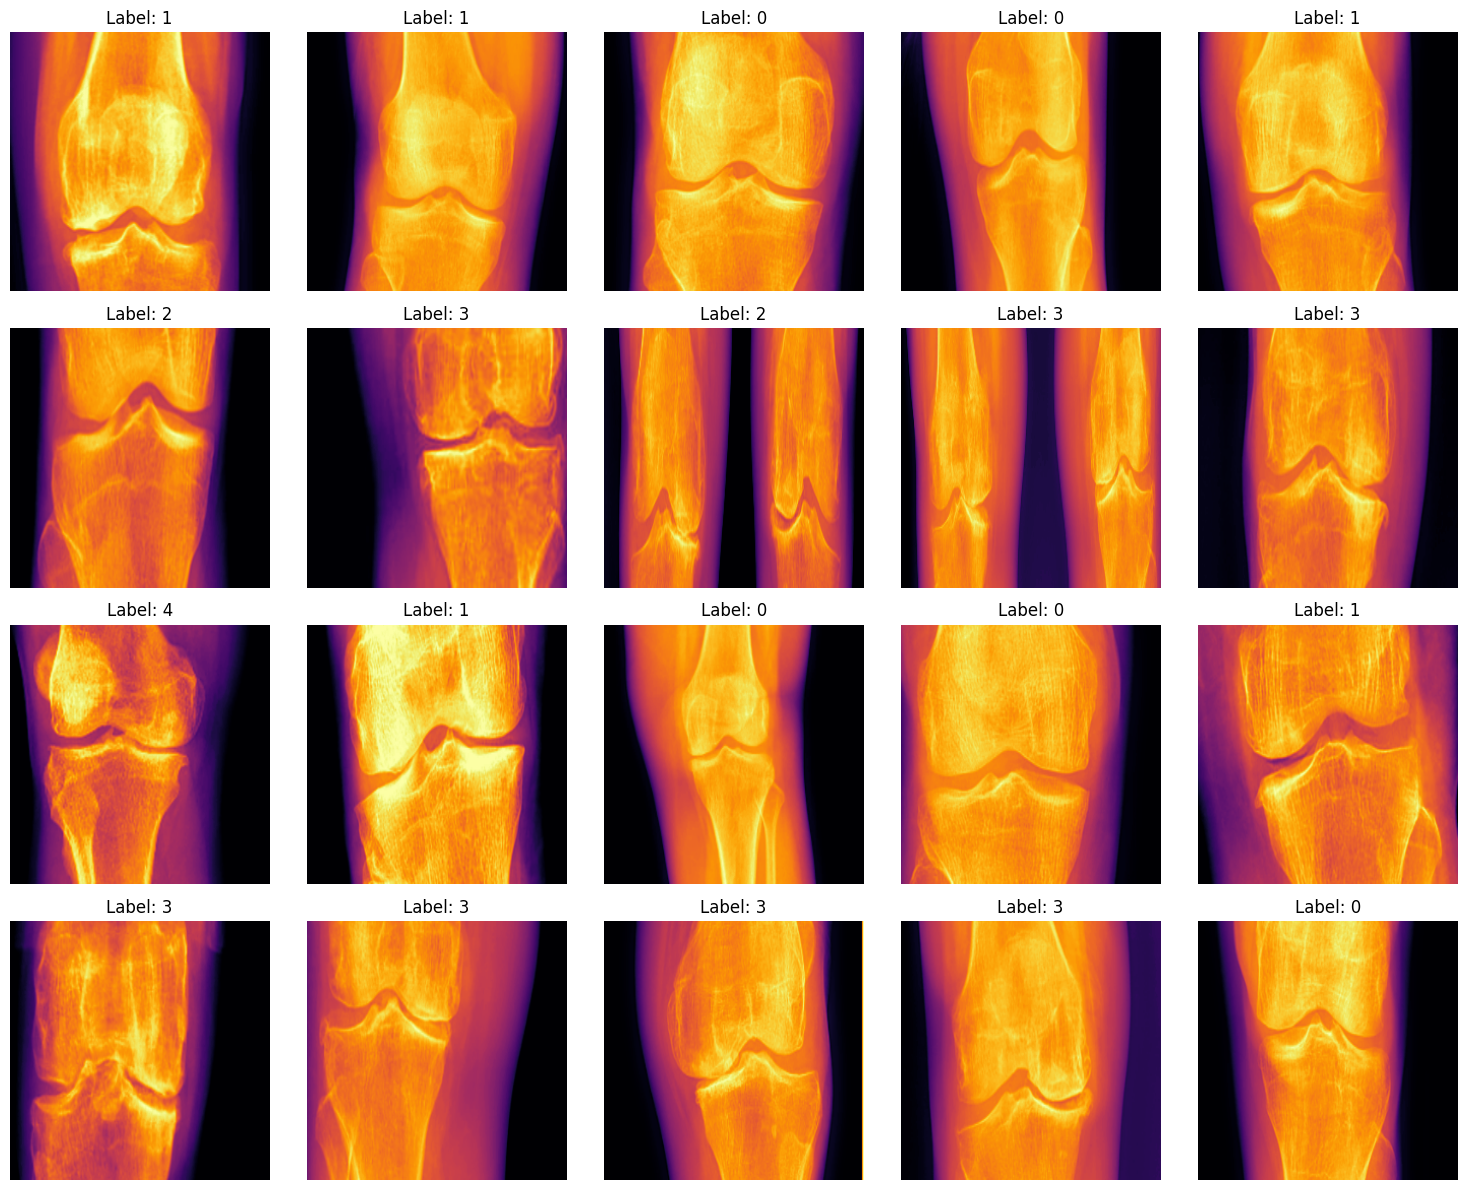

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


dataset = image_dataset_from_directory(
    "Training",
    color_mode="grayscale",
    image_size=(256, 256),
    batch_size=None,
)

import matplotlib.pyplot as plt

# Take first 20 images without shuffling
dataset_preview = dataset.take(20)

# Plotting
plt.figure(figsize=(15, 12))

for i, (image, label) in enumerate(dataset_preview):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8").squeeze(), cmap="inferno")
    plt.title(f"Label: {label.numpy().astype('uint8')}")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### 1.3. Split dataset.

In [ ]:
from tensorflow.keras.utils import split_dataset


train_dataset, test_dataset = split_dataset(dataset, right_size=0.1)
train_dataset, val_dataset = split_dataset(train_dataset, right_size=0.1)

print("Train size:", train_dataset.cardinality().numpy())
print("Test size:", test_dataset.cardinality().numpy())
print("Validation size:", test_dataset.cardinality().numpy())

Train size: 1337
Test size: 165
Validation size: 165


## 2. Build the initial model architecture.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


inputs = keras.Input(shape=(256, 256, 1))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │       737,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,908,965 (7.28 MB)

 Trainable params: 1,908,965 (7.28 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Train the model.

#### 3.1. Compile and launch training.

In [ ]:
batched_train_dataset = train_dataset.batch(32)
batched_val_dataset = val_dataset.batch(32)

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    batched_train_dataset,
    epochs=20,
    validation_data=batched_val_dataset,
)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 264ms/step - accuracy: 0.2606 - loss: 1.6363 - val_accuracy: 0.3108 - val_loss: 1.5436
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.3044 - loss: 1.5444 - val_accuracy: 0.3108 - val_loss: 1.5432
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.3014 - loss: 1.5416 - val_accuracy: 0.3108 - val_loss: 1.5435
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.2877 - loss: 1.5404 - val_accuracy: 0.3108 - val_loss: 1.5430
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.2990 - loss: 1.5385 - val_accuracy: 0.3108 - val_loss: 1.5423
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.3043 - loss: 1.5387 - val_accuracy: 0.3108 - val_loss: 1.5423
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.3155 - loss: 1.5382 - val_accuracy: 0.3108 - val_loss: 1.5419
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - accuracy: 0.3028 - loss: 1.5359 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt


def show_plots(history):
    accuracy = history["accuracy"]
    val_accuracy = history["val_accuracy"]
    loss = history["loss"]
    val_loss = history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "bo", label="Accuracy on the training step")
    plt.plot(epochs, val_accuracy, "b", label="Accuracy on the validation step")
    plt.title("Accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "bo", label="Loss on the training step")
    plt.plot(epochs, val_loss, "b", label="Loss on the validation step")
    plt.title("Loss")
    plt.legend()
    plt.show()

#### 3.2. Show results.

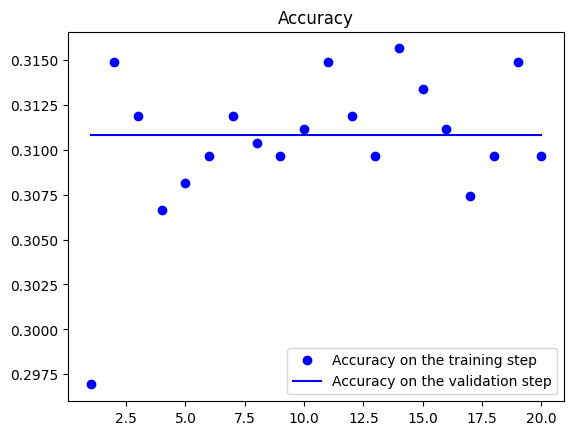

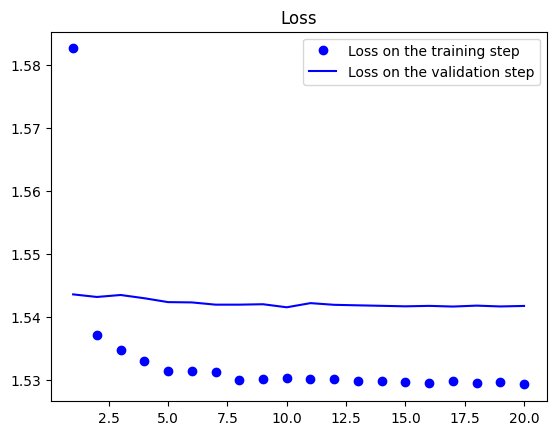

In [ ]:
show_plots(history.history)

## 4. Adjust the model architecture.

#### 4.1. Applying the data augmentation.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


inputs = keras.Input(shape=(256, 256, 1))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

batched_train_dataset = train_dataset.batch(32)
batched_val_dataset = val_dataset.batch(32)

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

callbacks = keras.callbacks.ModelCheckpoint(
    "best_cnn_with_data_augmentation.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    verbose=1
)


history = model.fit(
    batched_train_dataset,
    epochs=100,
    validation_data=batched_val_dataset,
    callbacks=callbacks,
)

Epoch 1/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2869 - loss: 1.5726
Epoch 1: val_accuracy improved from -inf to 0.31081, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2880 - loss: 1.5712 - val_accuracy: 0.3108 - val_loss: 1.5398
Epoch 2/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3008 - loss: 1.5401
Epoch 2: val_accuracy did not improve from 0.31081
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3017 - loss: 1.5392 - val_accuracy: 0.3108 - val_loss: 1.5328
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3042 - loss: 1.5184
Epoch 3: val_accuracy improved from 0.31081 to 0.31757, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3047 - loss: 1.5180 - val_accuracy: 0.3176 - val_loss: 1.5216
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3079 - loss: 1.5109
Epoch 4: val_accuracy improved from 0.31757 to 0.33108, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3086 - loss: 1.5105 - val_accuracy: 0.3311 - val_loss: 1.5071
Epoch 5/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3211 - loss: 1.5043
Epoch 5: val_accuracy did not improve from 0.33108
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3225 - loss: 1.5033 - val_accuracy: 0.3311 - val_loss: 1.5033
Epoch 6/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3141 - loss: 1.5078
Epoch 6: val_accuracy did not improve from 0.33108
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3155 - loss: 1.5068 - val_accuracy: 0.3243 - val_loss: 1.4959
Epoch 7/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3185 - loss: 1.4962
Epoch 7: val_accuracy improved from 0.33108 to 0.35135, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3195 - loss: 1.4958 - val_accuracy: 0.3514 - val_loss: 1.4867
Epoch 8/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3391 - loss: 1.4886
Epoch 8: val_accuracy did not improve from 0.35135
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3394 - loss: 1.4881 - val_accuracy: 0.3514 - val_loss: 1.4883
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3183 - loss: 1.4976
Epoch 9: val_accuracy did not improve from 0.35135
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3185 - loss: 1.4974 - val_accuracy: 0.3446 - val_loss: 1.4739
Epoch 10/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3185 - loss: 1.4876
Epoch 10: val_accuracy did not improve from 0.35135
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3201 - loss: 1.4868 - val_accuracy: 0.3446 - val_loss: 1.4798
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3206 - loss: 1.4807
Epoch 11: val_accuracy improved from

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3213 - loss: 1.4804 - val_accuracy: 0.3581 - val_loss: 1.4721
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3417 - loss: 1.4813
Epoch 12: val_accuracy did not improve from 0.35811
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3421 - loss: 1.4810 - val_accuracy: 0.3514 - val_loss: 1.4663
Epoch 13/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3233 - loss: 1.4871
Epoch 13: val_accuracy did not improve from 0.35811
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3248 - loss: 1.4862 - val_accuracy: 0.3581 - val_loss: 1.4589
Epoch 14/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3491 - loss: 1.4743
Epoch 14: val_accuracy improved from 0.35811 to 0.41216, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3499 - loss: 1.4730 - val_accuracy: 0.4122 - val_loss: 1.4382
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3496 - loss: 1.4577
Epoch 15: val_accuracy did not improve from 0.41216
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3499 - loss: 1.4576 - val_accuracy: 0.4054 - val_loss: 1.4283
Epoch 16/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3474 - loss: 1.4509
Epoch 16: val_accuracy did not improve from 0.41216
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3490 - loss: 1.4502 - val_accuracy: 0.3851 - val_loss: 1.4277
Epoch 17/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3774 - loss: 1.4281
Epoch 17: val_accuracy improved from 0.41216 to 0.41892, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3778 - loss: 1.4278 - val_accuracy: 0.4189 - val_loss: 1.3869
Epoch 18/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3769 - loss: 1.4157
Epoch 18: val_accuracy improved from 0.41892 to 0.43919, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3772 - loss: 1.4154 - val_accuracy: 0.4392 - val_loss: 1.3718
Epoch 19/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4018 - loss: 1.3883
Epoch 19: val_accuracy improved from 0.43919 to 0.45270, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4024 - loss: 1.3881 - val_accuracy: 0.4527 - val_loss: 1.3388
Epoch 20/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4185 - loss: 1.3683
Epoch 20: val_accuracy did not improve from 0.45270
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4187 - loss: 1.3687 - val_accuracy: 0.4527 - val_loss: 1.3126
Epoch 21/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4250 - loss: 1.3591
Epoch 21: val_accuracy improved from 0.45270 to 0.52703, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4256 - loss: 1.3584 - val_accuracy: 0.5270 - val_loss: 1.2687
Epoch 22/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4380 - loss: 1.3439
Epoch 22: val_accuracy improved from 0.52703 to 0.54054, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4375 - loss: 1.3441 - val_accuracy: 0.5405 - val_loss: 1.2654
Epoch 23/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4433 - loss: 1.3300
Epoch 23: val_accuracy did not improve from 0.54054
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4436 - loss: 1.3297 - val_accuracy: 0.5135 - val_loss: 1.2579
Epoch 24/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4494 - loss: 1.3228
Epoch 24: val_accuracy did not improve from 0.54054
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4497 - loss: 1.3234 - val_accuracy: 0.5000 - val_loss: 1.2470
Epoch 25/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4521 - loss: 1.3192
Epoch 25: val_accuracy did not improve from 0.54054
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4530 - loss: 1.3185 - val_accuracy: 0.4932 - val_loss: 1.2274
Epoch 26/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4717 - loss: 1.2836
Epoch 26: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5021 - loss: 1.2104 - val_accuracy: 0.5541 - val_loss: 1.1399
Epoch 33/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4949 - loss: 1.2402
Epoch 33: val_accuracy did not improve from 0.55405
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4946 - loss: 1.2392 - val_accuracy: 0.5068 - val_loss: 1.1482
Epoch 34/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5164 - loss: 1.1978
Epoch 34: val_accuracy improved from 0.55405 to 0.57432, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5161 - loss: 1.1985 - val_accuracy: 0.5743 - val_loss: 1.0812
Epoch 35/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5220 - loss: 1.1542
Epoch 35: val_accuracy did not improve from 0.57432
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5207 - loss: 1.1560 - val_accuracy: 0.4865 - val_loss: 1.1548
Epoch 36/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4986 - loss: 1.1988
Epoch 36: val_accuracy did not improve from 0.57432
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4987 - loss: 1.1988 - val_accuracy: 0.5270 - val_loss: 1.1410
Epoch 37/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5518 - loss: 1.1356
Epoch 37: val_accuracy did not improve from 0.57432
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5508 - loss: 1.1364 - val_accuracy: 0.5405 - val_loss: 1.0825
Epoch 38/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5376 - loss: 1.1285
Epoch 38: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5240 - loss: 1.1287 - val_accuracy: 0.5811 - val_loss: 1.0708
Epoch 40/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5432 - loss: 1.1357
Epoch 40: val_accuracy improved from 0.58108 to 0.58784, saving model to best_cnn_with_data_augmentation.h5


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5429 - loss: 1.1359 - val_accuracy: 0.5878 - val_loss: 1.0150
Epoch 41/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5419 - loss: 1.1320
Epoch 41: val_accuracy did not improve from 0.58784
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5405 - loss: 1.1333 - val_accuracy: 0.5473 - val_loss: 1.0652
Epoch 42/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5390 - loss: 1.0983
Epoch 42: val_accuracy did not improve from 0.58784
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5381 - loss: 1.0995 - val_accuracy: 0.5270 - val_loss: 1.0830
Epoch 43/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5583 - loss: 1.0819
Epoch 43: val_accuracy did not improve from 0.58784
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5579 - loss: 1.0825 - val_accuracy: 0.5338 - val_loss: 1.0842
Epoch 44/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5764 - loss: 1.0557
Epoch 44: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5991 - loss: 0.9899 - val_accuracy: 0.6149 - val_loss: 1.0147
Epoch 51/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5796 - loss: 1.0185
Epoch 51: val_accuracy did not improve from 0.61486
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5792 - loss: 1.0202 - val_accuracy: 0.6081 - val_loss: 1.0312
Epoch 52/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5803 - loss: 1.0283
Epoch 52: val_accuracy did not improve from 0.61486
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5795 - loss: 1.0295 - val_accuracy: 0.5135 - val_loss: 1.0787
Epoch 53/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5814 - loss: 1.0331
Epoch 53: val_accuracy did not improve from 0.61486
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5815 - loss: 1.0334 - val_accuracy: 0.6081 - val_loss: 0.9730
Epoch 54/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6134 - loss: 0.9732
Epoch 54: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6335 - loss: 0.9194 - val_accuracy: 0.6351 - val_loss: 0.9336
Epoch 62/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5972 - loss: 0.9427
Epoch 62: val_accuracy did not improve from 0.63514
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5976 - loss: 0.9441 - val_accuracy: 0.6149 - val_loss: 0.9485
Epoch 63/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6362 - loss: 0.9291
Epoch 63: val_accuracy did not improve from 0.63514
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6351 - loss: 0.9318 - val_accuracy: 0.5608 - val_loss: 0.9728
Epoch 64/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6011 - loss: 0.9348
Epoch 64: val_accuracy did not improve from 0.63514
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6010 - loss: 0.9361 - val_accuracy: 0.6014 - val_loss: 0.9707
Epoch 65/100
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6317 - loss: 0.9305
Epoch 65: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6397 - loss: 0.8985 - val_accuracy: 0.6486 - val_loss: 0.9063
Epoch 72/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6258 - loss: 0.9318
Epoch 72: val_accuracy did not improve from 0.64865
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6259 - loss: 0.9309 - val_accuracy: 0.6486 - val_loss: 0.9458
Epoch 73/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6561 - loss: 0.8459
Epoch 73: val_accuracy did not improve from 0.64865
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6558 - loss: 0.8474 - val_accuracy: 0.6351 - val_loss: 0.9119
Epoch 74/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6568 - loss: 0.8673
Epoch 74: val_accuracy did not improve from 0.64865
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6559 - loss: 0.8689 - val_accuracy: 0.6284 - val_loss: 0.9268
Epoch 75/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6493 - loss: 0.8794
Epoch 75: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6411 - loss: 0.8847 - val_accuracy: 0.6554 - val_loss: 0.9029
Epoch 77/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6572 - loss: 0.8594
Epoch 77: val_accuracy did not improve from 0.65541
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6571 - loss: 0.8596 - val_accuracy: 0.6081 - val_loss: 0.9817
Epoch 78/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6658 - loss: 0.8459
Epoch 78: val_accuracy did not improve from 0.65541
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6667 - loss: 0.8465 - val_accuracy: 0.6351 - val_loss: 0.9490
Epoch 79/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6608 - loss: 0.8591
Epoch 79: val_accuracy did not improve from 0.65541
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6610 - loss: 0.8598 - val_accuracy: 0.6284 - val_loss: 0.9666
Epoch 80/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6810 - loss: 0.8373
Epoch 80: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6885 - loss: 0.7899 - val_accuracy: 0.6689 - val_loss: 0.8995
Epoch 82/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6774 - loss: 0.8434
Epoch 82: val_accuracy did not improve from 0.66892
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6770 - loss: 0.8438 - val_accuracy: 0.6486 - val_loss: 0.9122
Epoch 83/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6570 - loss: 0.8416
Epoch 83: val_accuracy did not improve from 0.66892
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6564 - loss: 0.8423 - val_accuracy: 0.6622 - val_loss: 0.8471
Epoch 84/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6720 - loss: 0.8320
Epoch 84: val_accuracy did not improve from 0.66892
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6718 - loss: 0.8326 - val_accuracy: 0.6689 - val_loss: 0.8986
Epoch 85/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6579 - loss: 0.8323
Epoch 85: val_accuracy did not i

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6991 - loss: 0.7739 - val_accuracy: 0.6892 - val_loss: 0.8606
Epoch 92/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7057 - loss: 0.7754
Epoch 92: val_accuracy did not improve from 0.68919
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7045 - loss: 0.7769 - val_accuracy: 0.6486 - val_loss: 0.9059
Epoch 93/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6765 - loss: 0.8059
Epoch 93: val_accuracy did not improve from 0.68919
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6762 - loss: 0.8062 - val_accuracy: 0.6689 - val_loss: 0.9104
Epoch 94/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7048 - loss: 0.7598
Epoch 94: val_accuracy did not improve from 0.68919
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7045 - loss: 0.7607 - val_accuracy: 0.6081 - val_loss: 0.8993
Epoch 95/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6794 - loss: 0.7775
Epoch 95: val_accuracy did not i

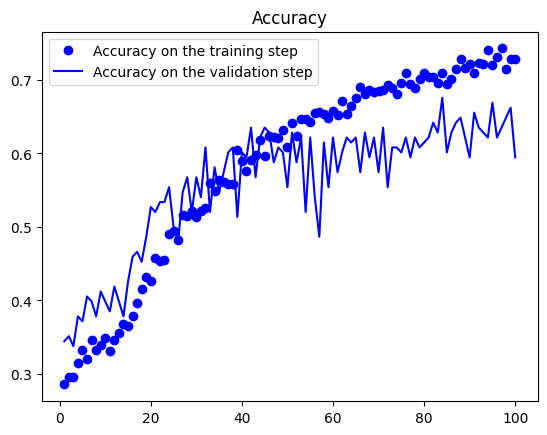

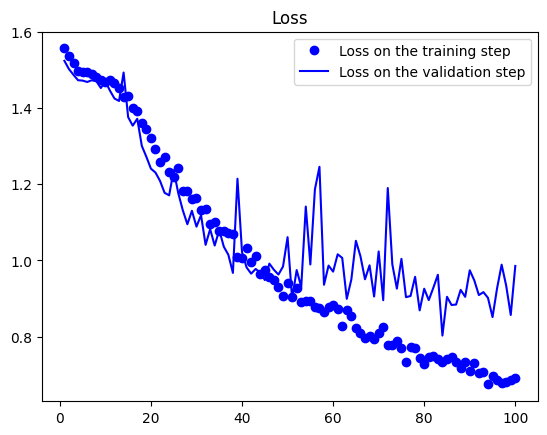

In [ ]:
show_plots(history.history)

In [ ]:
max(history.history["val_accuracy"])

# To improve the model, we cropped the knee region to focus only on the joint, enhanced the X-ray contrast for clearer visibility, and applied various data augmentations — which helped the model understand the features better.

0.6891891956329346

In [ ]:
loaded_model = keras.models.load_model("best_cnn_with_data_augmentation.h5")
loaded_model.summary()

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 254, 254, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 125, 125, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │        92,165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,407 (743.78 KB)

 Trainable params: 190,405 (743.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
loaded_model.evaluate(test_dataset.batch(32))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6250 - loss: 0.8502


[0.8447571992874146, 0.6303030252456665]

#### 4.2. Add fully-connected layers.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


inputs = keras.Input(shape=(256, 256, 1))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

batched_train_dataset = train_dataset.batch(16)
batched_val_dataset = val_dataset.batch(16)

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

callbacks = keras.callbacks.ModelCheckpoint(
    "best_cnn_with_data_augmentation_and_dense.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    verbose=1
)

history = model.fit(
    batched_train_dataset,
    epochs=300,
    validation_data=batched_val_dataset,
    callbacks=callbacks,
)

Epoch 1/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3090 - loss: 1.5695
Epoch 1: val_accuracy improved from -inf to 0.31081, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3093 - loss: 1.5687 - val_accuracy: 0.3108 - val_loss: 1.5475
Epoch 2/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3093 - loss: 1.5433
Epoch 2: val_accuracy did not improve from 0.31081
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3094 - loss: 1.5431 - val_accuracy: 0.3108 - val_loss: 1.5429
Epoch 3/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2976 - loss: 1.5302
Epoch 3: val_accuracy did not improve from 0.31081
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2981 - loss: 1.5299 - val_accuracy: 0.2973 - val_loss: 1.5317
Epoch 4/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2983 - loss: 1.5114
Epoch 4: val_accuracy did not improve from 0.31081
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2986 - loss: 1.5113 - val_accuracy: 0.2905 - val_loss: 1.5187
Epoch 5/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3028 - loss: 1.5102
Epoch 5: val_accuracy did not improve f

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3003 - loss: 1.5035 - val_accuracy: 0.3243 - val_loss: 1.4888
Epoch 7/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3227 - loss: 1.4928
Epoch 7: val_accuracy improved from 0.32432 to 0.33108, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3228 - loss: 1.4927 - val_accuracy: 0.3311 - val_loss: 1.5048
Epoch 8/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3052 - loss: 1.4970
Epoch 8: val_accuracy improved from 0.33108 to 0.34459, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3057 - loss: 1.4967 - val_accuracy: 0.3446 - val_loss: 1.4697
Epoch 9/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3229 - loss: 1.4844
Epoch 9: val_accuracy improved from 0.34459 to 0.35135, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3231 - loss: 1.4842 - val_accuracy: 0.3514 - val_loss: 1.4634
Epoch 10/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3295 - loss: 1.4783
Epoch 10: val_accuracy did not improve from 0.35135
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3295 - loss: 1.4782 - val_accuracy: 0.3378 - val_loss: 1.4511
Epoch 11/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3368 - loss: 1.4775
Epoch 11: val_accuracy did not improve from 0.35135
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3378 - loss: 1.4768 - val_accuracy: 0.3378 - val_loss: 1.4359
Epoch 12/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3317 - loss: 1.4537
Epoch 12: val_accuracy improved from 0.35135 to 0.36486, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3319 - loss: 1.4536 - val_accuracy: 0.3649 - val_loss: 1.4073
Epoch 13/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3627 - loss: 1.4276
Epoch 13: val_accuracy improved from 0.36486 to 0.43919, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3633 - loss: 1.4271 - val_accuracy: 0.4392 - val_loss: 1.3197
Epoch 14/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3918 - loss: 1.3915
Epoch 14: val_accuracy improved from 0.43919 to 0.46622, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3917 - loss: 1.3914 - val_accuracy: 0.4662 - val_loss: 1.2915
Epoch 15/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4234 - loss: 1.3563
Epoch 15: val_accuracy improved from 0.46622 to 0.48649, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4233 - loss: 1.3564 - val_accuracy: 0.4865 - val_loss: 1.2574
Epoch 16/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4335 - loss: 1.3172
Epoch 16: val_accuracy did not improve from 0.48649
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4338 - loss: 1.3172 - val_accuracy: 0.3986 - val_loss: 1.3177
Epoch 17/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4372 - loss: 1.2973
Epoch 17: val_accuracy did not improve from 0.48649
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4373 - loss: 1.2973 - val_accuracy: 0.4122 - val_loss: 1.2585
Epoch 18/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4547 - loss: 1.2868
Epoch 18: val_accuracy did not improve from 0.48649
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4547 - loss: 1.2868 - val_accuracy: 0.4865 - val_loss: 1.1722
Epoch 19/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4607 - loss: 1.2436
Epoch 19: val_accuracy improved 

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4612 - loss: 1.2435 - val_accuracy: 0.5608 - val_loss: 1.1061
Epoch 20/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4840 - loss: 1.2160
Epoch 20: val_accuracy did not improve from 0.56081
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4839 - loss: 1.2164 - val_accuracy: 0.5608 - val_loss: 1.0896
Epoch 21/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5210 - loss: 1.1544
Epoch 21: val_accuracy did not improve from 0.56081
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5206 - loss: 1.1556 - val_accuracy: 0.5000 - val_loss: 1.1054
Epoch 22/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4955 - loss: 1.1594
Epoch 22: val_accuracy did not improve from 0.56081
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4955 - loss: 1.1595 - val_accuracy: 0.5541 - val_loss: 1.0733
Epoch 23/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5164 - loss: 1.1432
Epoch 23: val_accuracy did not i

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5143 - loss: 1.1384 - val_accuracy: 0.5676 - val_loss: 1.0343
Epoch 26/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5273 - loss: 1.1014
Epoch 26: val_accuracy did not improve from 0.56757
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5273 - loss: 1.1024 - val_accuracy: 0.5068 - val_loss: 1.0671
Epoch 27/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5596 - loss: 1.0572
Epoch 27: val_accuracy did not improve from 0.56757
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5593 - loss: 1.0580 - val_accuracy: 0.5473 - val_loss: 1.0109
Epoch 28/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5771 - loss: 1.0577
Epoch 28: val_accuracy improved from 0.56757 to 0.62838, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5756 - loss: 1.0598 - val_accuracy: 0.6284 - val_loss: 1.0055
Epoch 29/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5507 - loss: 1.0567
Epoch 29: val_accuracy did not improve from 0.62838
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5508 - loss: 1.0574 - val_accuracy: 0.6014 - val_loss: 0.9932
Epoch 30/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5671 - loss: 1.0474
Epoch 30: val_accuracy did not improve from 0.62838
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5671 - loss: 1.0476 - val_accuracy: 0.6284 - val_loss: 1.0188
Epoch 31/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5490 - loss: 1.0315
Epoch 31: val_accuracy did not improve from 0.62838
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5498 - loss: 1.0321 - val_accuracy: 0.5878 - val_loss: 1.0284
Epoch 32/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5744 - loss: 0.9830
Epoch 32: val_accuracy improved 

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5743 - loss: 0.9837 - val_accuracy: 0.6486 - val_loss: 0.9217
Epoch 33/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5825 - loss: 0.9913
Epoch 33: val_accuracy did not improve from 0.64865
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5829 - loss: 0.9926 - val_accuracy: 0.6486 - val_loss: 0.9132
Epoch 34/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5997 - loss: 0.9787
Epoch 34: val_accuracy improved from 0.64865 to 0.66216, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5996 - loss: 0.9788 - val_accuracy: 0.6622 - val_loss: 0.9042
Epoch 35/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5932 - loss: 0.9795
Epoch 35: val_accuracy did not improve from 0.66216
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5931 - loss: 0.9799 - val_accuracy: 0.6419 - val_loss: 0.9404
Epoch 36/300
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6108 - loss: 0.9525
Epoch 36: val_accuracy did not improve from 0.66216
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6101 - loss: 0.9537 - val_accuracy: 0.6554 - val_loss: 0.8817
Epoch 37/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5998 - loss: 0.9593
Epoch 37: val_accuracy did not improve from 0.66216
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5994 - loss: 0.9600 - val_accuracy: 0.6419 - val_loss: 0.8420
Epoch 38/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6108 - loss: 0.9630
Epoch 38: val_accuracy did not i

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6367 - loss: 0.9028 - val_accuracy: 0.6689 - val_loss: 0.8956
Epoch 43/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6337 - loss: 0.8959
Epoch 43: val_accuracy did not improve from 0.66892
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6338 - loss: 0.8961 - val_accuracy: 0.6486 - val_loss: 0.8580
Epoch 44/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6616 - loss: 0.8419
Epoch 44: val_accuracy did not improve from 0.66892
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6612 - loss: 0.8430 - val_accuracy: 0.6351 - val_loss: 0.9325
Epoch 45/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6544 - loss: 0.8743
Epoch 45: val_accuracy did not improve from 0.66892
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6541 - loss: 0.8748 - val_accuracy: 0.6622 - val_loss: 0.9259
Epoch 46/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6485 - loss: 0.8517
Epoch 46: val_accuracy did not i

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6516 - loss: 0.8570 - val_accuracy: 0.6824 - val_loss: 0.9231
Epoch 51/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6605 - loss: 0.8571
Epoch 51: val_accuracy did not improve from 0.68243
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6605 - loss: 0.8573 - val_accuracy: 0.6554 - val_loss: 0.9777
Epoch 52/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6615 - loss: 0.8400
Epoch 52: val_accuracy did not improve from 0.68243
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6615 - loss: 0.8401 - val_accuracy: 0.6757 - val_loss: 0.8270
Epoch 53/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6905 - loss: 0.7934
Epoch 53: val_accuracy did not improve from 0.68243
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6902 - loss: 0.7945 - val_accuracy: 0.6419 - val_loss: 0.9295
Epoch 54/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6846 - loss: 0.8117
Epoch 54: val_accuracy did not i

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6595 - loss: 0.8216 - val_accuracy: 0.7162 - val_loss: 0.8744
Epoch 60/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6706 - loss: 0.8007
Epoch 60: val_accuracy did not improve from 0.71622
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6707 - loss: 0.8011 - val_accuracy: 0.6757 - val_loss: 0.8816
Epoch 61/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6861 - loss: 0.7866
Epoch 61: val_accuracy did not improve from 0.71622
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6862 - loss: 0.7874 - val_accuracy: 0.6351 - val_loss: 0.9192
Epoch 62/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6908 - loss: 0.7677
Epoch 62: val_accuracy did not improve from 0.71622
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6906 - loss: 0.7682 - val_accuracy: 0.6419 - val_loss: 0.9339
Epoch 63/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6830 - loss: 0.7785
Epoch 63: val_accuracy did not i

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7014 - loss: 0.7790 - val_accuracy: 0.7365 - val_loss: 0.8527
Epoch 73/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7459 - loss: 0.7372
Epoch 73: val_accuracy did not improve from 0.73649
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7455 - loss: 0.7374 - val_accuracy: 0.6486 - val_loss: 0.9432
Epoch 74/300
81/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7302 - loss: 0.7027
Epoch 74: val_accuracy did not improve from 0.73649
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7297 - loss: 0.7036 - val_accuracy: 0.7027 - val_loss: 0.9016
Epoch 75/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7349 - loss: 0.6991
Epoch 75: val_accuracy did not improve from 0.73649
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7344 - loss: 0.6997 - val_accuracy: 0.5811 - val_loss: 1.2570
Epoch 76/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7300 - loss: 0.6792
Epoch 76: val_accuracy did not i

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7756 - loss: 0.5746 - val_accuracy: 0.7500 - val_loss: 1.0081
Epoch 123/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7806 - loss: 0.5909
Epoch 123: val_accuracy did not improve from 0.75000
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7807 - loss: 0.5906 - val_accuracy: 0.6892 - val_loss: 0.9156
Epoch 124/300
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7897 - loss: 0.5660
Epoch 124: val_accuracy did not improve from 0.75000
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7895 - loss: 0.5661 - val_accuracy: 0.6824 - val_loss: 0.9751
Epoch 125/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8009 - loss: 0.5572
Epoch 125: val_accuracy did not improve from 0.75000
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8011 - loss: 0.5567 - val_accuracy: 0.6486 - val_loss: 1.3216
Epoch 126/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7947 - loss: 0.5698
Epoch 126: val_accuracy d

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8027 - loss: 0.5234 - val_accuracy: 0.7568 - val_loss: 0.8722
Epoch 148/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8143 - loss: 0.5508
Epoch 148: val_accuracy did not improve from 0.75676
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8143 - loss: 0.5508 - val_accuracy: 0.7027 - val_loss: 0.9362
Epoch 149/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8204 - loss: 0.5128
Epoch 149: val_accuracy improved from 0.75676 to 0.77703, saving model to best_cnn_with_data_augmentation_and_dense.h5


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8204 - loss: 0.5129 - val_accuracy: 0.7770 - val_loss: 0.9096
Epoch 150/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8104 - loss: 0.5036
Epoch 150: val_accuracy did not improve from 0.77703
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8104 - loss: 0.5037 - val_accuracy: 0.7297 - val_loss: 0.9179
Epoch 151/300
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8072 - loss: 0.5133
Epoch 151: val_accuracy did not improve from 0.77703
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8073 - loss: 0.5131 - val_accuracy: 0.7297 - val_loss: 0.9436
Epoch 152/300
82/84 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8079 - loss: 0.5416
Epoch 152: val_accuracy did not improve from 0.77703
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8080 - loss: 0.5417 - val_accuracy: 0.6959 - val_loss: 0.9149
Epoch 153/300
83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8300 - loss: 0.4562
Epoch 153: val_accuracy d

In [ ]:
max(history.history["val_accuracy"])

0.7770270109176636

In [ ]:
loaded_model = keras.models.load_model("best_cnn_with_data_augmentation_and_dense.h5")
loaded_model.evaluate(test_dataset.batch(32))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6732 - loss: 0.8483 


[0.8059360384941101, 0.6969696879386902]

In [ ]:
loaded_model.summary()

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 254, 254, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 125, 125, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,345,223 (20.39 MB)

 Trainable params: 5,345,221 (20.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

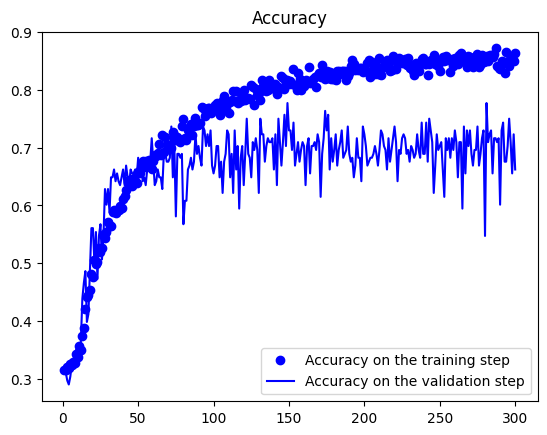

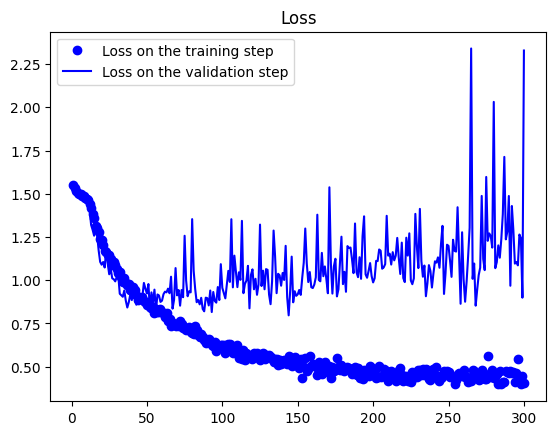

In [ ]:
show_plots(history.history)

In [ ]:
# Evaluate on test dataset
test_loss, test_acc = loaded_model.evaluate(test_dataset.batch(32), verbose=0)

# Extract training and validation accuracy history
train_acc_final = history.history['accuracy'][-1]
best_val_acc = max(history.history['val_accuracy'])

# Print final results
print(f"✅ Final Training Accuracy    : {train_acc_final * 100:.2f}%")
print(f"✅ Best Validation Accuracy   : {best_val_acc * 100:.2f}%")
print(f"✅ Final Test Accuracy        : {test_acc * 100:.2f}%")

✅ Final Training Accuracy    : 86.39%
✅ Best Validation Accuracy   : 77.70%
✅ Final Test Accuracy        : 69.70%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Actual Label: 4 | Predicted Label: 4


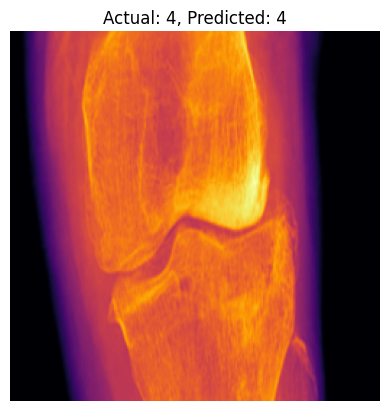


✅ Matched: 1/1
📊 Accuracy: 100.00%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

correct_predictions = 0
total_predictions = 1

# Shuffle and take 5 random samples
for image, label in test_dataset.shuffle(1000).take(total_predictions):
    # Expand dimensions to make it a batch of one image
    img = np.expand_dims(image.numpy(), axis=0)

    # Predict using the loaded model
    prediction = loaded_model.predict(img)
    predicted_label = np.argmax(prediction)

    # Actual label
    actual_label = label.numpy().astype("uint8")

    # Check if prediction is correct
    if predicted_label == actual_label:
        correct_predictions += 1

    # Print and show image
    print(f"Actual Label: {actual_label} | Predicted Label: {predicted_label}")
    plt.imshow(image.numpy().astype("uint8").squeeze(), cmap="inferno")
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# 🔢 Accuracy
accuracy = (correct_predictions / total_predictions) * 100
print(f"\n✅ Matched: {correct_predictions}/{total_predictions}")
print(f"📊 Accuracy: {accuracy:.2f}%")